# 🌡️ 연도별 7월 폭염 데이터 분석 실습

이 노트북은 여러 연도의 7월 폭염 데이터를 바탕으로 **연도별 평균 최고기온의 변화**를 분석하는 실습 예제입니다.

## ✅ 실습 목표
- 폭염 관련 `.csv` 데이터를 연도별로 통합한다.
- `pandas`로 날짜 데이터를 처리하고 연도별로 그룹화한다.
- `matplotlib`을 이용해 시계열 그래프로 시각화한다.

---

## 🔧 Step 1. 라이브러리 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium


## 📂 Step 2. 데이터 파일 불러오기 및 연도 통합

In [ ]:
# 변환된 폭염 CSV 파일 리스트
file_paths = [
    "heatwave_2021_07.csv",
    "heatwave_2022_07.csv",
    "heatwave_2023_07.csv",
    "heatwave_2024_07.csv",
    "heatwave_2025_07.csv"
]

# 연도별 통합 데이터프레임 생성
combined_df = pd.DataFrame()

for path in file_paths:
    df = pd.read_csv(path, encoding="utf-8-sig")
    df.columns = df.columns.str.strip()  # 공백 제거
    if '일시' in df.columns:
        df['일시'] = pd.to_datetime(df['일시'], errors='coerce')
        df['연도'] = df['일시'].dt.year
        combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df.head() # 5개의 연도별 데이터셋 csv 파일을 통합하여 dataframe 으로 변환 후 앞부분만 출력

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계),연도
0,2021-07-01,북강릉(104),X,28.1,26.4,21.8,18.1,86.8,X,,X,높음,2021
1,2021-07-01,동해(106),X,27.4,25.2,21.9,19.1,90.0,X,,X,매우높음,2021
2,2021-07-01,서울(108),X,31.3,31.0,26.3,21.4,70.9,O,관심,X,매우높음,2021
3,2021-07-01,인천(112),X,29.9,29.3,25.6,21.8,67.9,X,관심,X,매우높음,2021
4,2021-07-01,원주(114),X,31.0,31.3,25.0,19.0,70.0,X,관심,X,높음,2021


## 📊 Step 3. 연도별 평균 최고기온 계산

In [ ]:
# 최고기온 열이 존재하는지 확인하고 평균 계산
if '최고기온(°C)' in combined_df.columns:
    grouped = combined_df.groupby('연도')['최고기온(°C)'].mean().reset_index() #연도별 7월 최고기온 열의 평균값 계산
else:
    print("⚠️ '최고기온(°C)' 열이 존재하지 않습니다.")
grouped.head() # 계산된 dataframe의 앞부분만 출력
'''
  출력해보면, 2025년이 제일 덥네요 정말...
'''

'\n  출력해보면, 2025년이 제일 덥네요 정말...\n'

## 📈 Step 4. 시계열 그래프 시각화

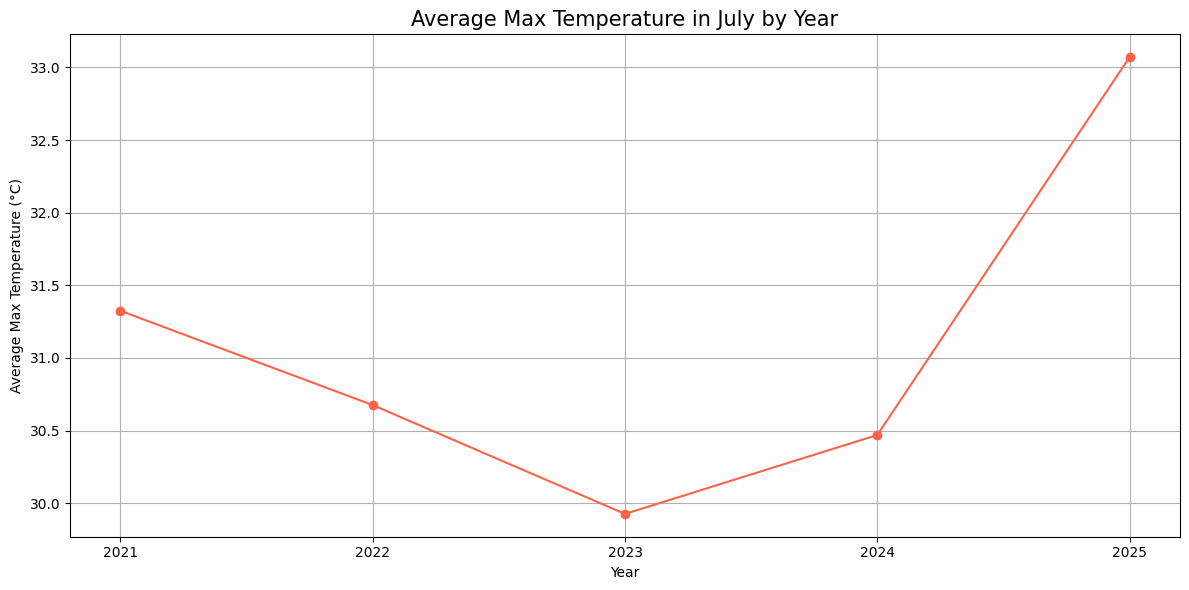

In [ ]:
# 연도별 평균 최고기온 시각화 (영문 버전)
plt.figure(figsize=(12, 6))
plt.plot(grouped['연도'], grouped['최고기온(°C)'], marker='o', color='tomato')
plt.title("Average Max Temperature in July by Year", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Max Temperature (°C)")
plt.xticks(range(2021, 2026))
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔍 추가 탐구 과제
- 폭염 여부(`폭염여부(O/X)`)가 'O'인 날의 개수를 연도별로 비교해보세요.
- 열대야 발생 여부(`열대야(O/X)`)의 빈도를 연도별로 확인해보세요.
- `폭염특보(O/X)` 비율이나 `자외선지수(단계)`의 평균 등도 함께 분석할 수 있습니다.

체감온도 vs. 상대습도 vs. 자외선 지수  산점도 이미지

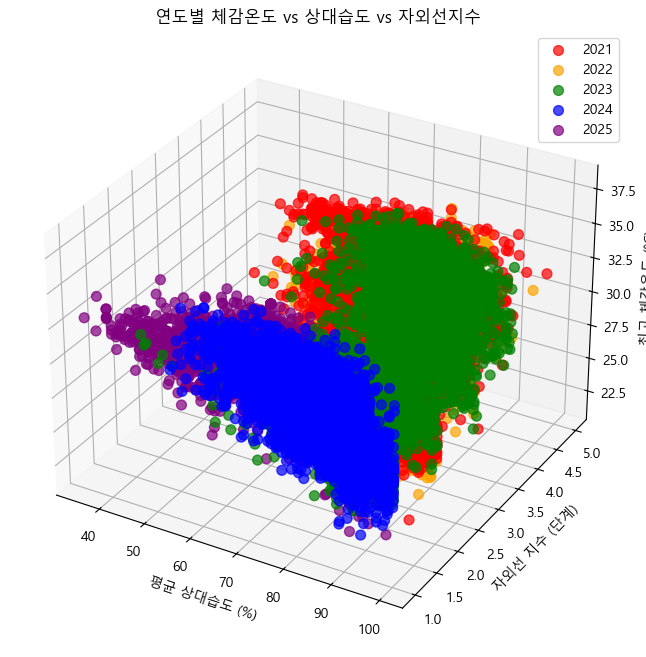

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 연도별 파일 리스트
file_list = [
    'heatwave_2021_07.csv',
    'heatwave_2022_07.csv',
    'heatwave_2023_07.csv',
    'heatwave_2024_07.csv',
    'heatwave_2025_07.csv'
]

# 모든 파일 읽어서 하나의 데이터프레임으로 합치기
df_list = []
for file in file_list:
    temp = pd.read_csv(file)
    year = int(file.split('_')[1])
    temp['연도'] = year
    df_list.append(temp)

df_all = pd.concat(df_list, ignore_index=True)

# 자외선 지수 문자열을 숫자로 변환
uv_mapping = {
    '낮음': 1,
    '보통': 2,
    '높음': 3,
    '매우높음': 4,
    '위험': 5
}
df_all['자외선지수(단계)'] = df_all['자외선지수(단계)'].map(uv_mapping)

# 필요한 컬럼 선택
df_all = df_all[['최고체감온도(°C)', '평균상대습도(%)', '자외선지수(단계)', '연도']]

# 3D 산점도 그리기
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# 연도별 색상 지정
colors = {2021:'red', 2022:'orange', 2023:'green', 2024:'blue', 2025:'purple'}
for year, group in df_all.groupby('연도'):
    ax.scatter(
        group['평균상대습도(%)'],
        group['자외선지수(단계)'],
        group['최고체감온도(°C)'],
        c=colors[year],
        label=str(year),
        s=50,
        alpha=0.7
    )

ax.set_xlabel('평균 상대습도 (%)')
ax.set_ylabel('자외선 지수 (단계)')
ax.set_zlabel('최고 체감온도 (°C)')
plt.title('연도별 체감온도 vs 상대습도 vs 자외선지수')
ax.legend()
plt.show()



체감온도 vs. 상대습도 vs. 자외선 지수 산점도 브라우저

In [2]:
import pandas as pd
import plotly.express as px

# 연도별 파일 리스트
file_list = [
    'heatwave_2021_07.csv',
    'heatwave_2022_07.csv',
    'heatwave_2023_07.csv',
    'heatwave_2024_07.csv',
    'heatwave_2025_07.csv'
]

# CSV 파일 합치기
df_list = []
for file in file_list:
    temp = pd.read_csv(file)
    year = int(file.split('_')[1])
    temp['연도'] = year
    df_list.append(temp)

df_all = pd.concat(df_list, ignore_index=True)

# 자외선 지수 문자열 → 숫자 변환
uv_mapping = {
    '낮음': 1,
    '보통': 2,
    '높음': 3,
    '매우높음': 4,
    '위험': 5
}
df_all['자외선지수(단계)'] = df_all['자외선지수(단계)'].map(uv_mapping)

# Plotly 3D 산점도 (브라우저에서 열기)
fig = px.scatter_3d(
    df_all,
    x='평균상대습도(%)',
    y='자외선지수(단계)',
    z='최고체감온도(°C)',
    color='연도',            # 연도별 색상
    symbol='지점',           # 지점별 마커
    hover_data=['일시'],      # 마우스 오버 시 일시 표시
    size_max=8
)

# 축 이름과 제목 한글로 설정
fig.update_layout(
    scene=dict(
        xaxis_title='평균 상대습도 (%)',
        yaxis_title='자외선 지수 (단계)',
        zaxis_title='최고 체감온도 (°C)'
    ),
    title='연도별·지점별 체감온도 3D 산점도'
)

# 브라우저에서 열기
fig.show(renderer='browser')
